<a href="https://colab.research.google.com/github/Nicsdiary/test-repo/blob/main/Keras_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from keras.datasets import reuters
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

#Keras에서 제공하는 Reuters news dataset을 로드하는 코드입니다.

#num_words=10000 매개변수는 데이터셋에서 가장 빈도가 높은 상위 10,000개의 단어만 사용하도록 지정
#train_data와 test_data는 각각 8,982개와 2,246개의 뉴스 기사를 담은 리스트입니다. 각각의 뉴스 기사는 단어의 시퀀스로 표현되며, 정수로 인코딩된 단어들의 리스트


2110848/2110848 [==============================] - 0s 0us/step


In [7]:
print(train_data.shape)
print(test_data.shape)

#train_data와 test_data의 형태(shape)를 출력하는 코드

(8982,)
(2246,)


In [8]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))

  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  
  return results

In [9]:
# 훈련데이터와 테스트 데이터의 벡터 변환 
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
# 라벨 데이터를 카테고리 데이터로 전환 
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [2]:
# 모델 구성
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# Keras를 사용하여 다중 분류(multi-class classification) 문제를 해결하기 위한 인공 신경망 모델을 구성하는 코드
#models.Sequential()은 Sequential 모델을 생성하는 함수입니다. Sequential 모델은 인공 신경망 모델의 일반적인 형태 중 하나로, 
#각 층(layer)을 차례로 쌓아서 모델을 구성합니다.

#layers.Dense()는 밀집층(dense layer)을 생성하는 함수입니다. 밀집층은 인공 신경망에서 가장 기본적인 층으로, 
#이전 층의 모든 뉴런과 연결된 층입니다. 

#activation 매개변수는 활성화 함수를 지정합니다. 여기서는 ReLU(Rectified Linear Unit) 활성화 함수를 사용합니다. 
#input_shape 매개변수는 첫 번째 층에서만 사용되며, 입력 데이터의 크기를 지정합니다. 여기서는 이진 벡터로 변환된 각 뉴스 기사의 크기가 10,000이므로, (10000,)로 입력 크기를 지정합니다.

#모델은 총 3개의 층으로 구성됩니다. 첫 번째와 두 번째 층은 각각 64개의 뉴런을 가진 밀집층으로, ReLU 활성화 함수를 사용합니다. 마지막 층은 46개의 뉴런을 가진 밀집층으로, 소프트맥스(softmax) 활성화 함수를 사용합니다. 이는 출력값을 각 클래스에 대한 확률로 해석할 수 있도록 하기 위함입니다. 
#즉, 모델이 입력된 뉴스 기사가 어떤 클래스에 속할 확률이 가장 높은지를 출력하도록 합니다.


In [3]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

# Keras를 사용하여 구성한 인공 신경망 모델에 대해 컴파일을 수행
#model.compile() 함수는 모델을 컴파일하는 함수이며, 3개의 매개변수를 입력
#optimizer 매개변수는 모델을 최적화하는 방법을 지정합니다. 여기서는 RMSprop을 사용합니다. 
#RMSprop은 Adaptive Learning Rate를 사용하여 경사 하강법을 최적화하는 방법 중 하나

#loss 매개변수는 손실 함수(loss function)를 지정합니다. 다중 분류 문제에서는 categorical_crossentropy를 사용합니다. categorical_crossentropy는 다중 분류에서 사용하는 손실 함수 중 하나로, 모델이 예측한 확률 분포와 실제 클래스 분포 간의 차이를 계산합니다.
#metrics 매개변수는 모델이 평가할 지표를 지정합니다. 여기서는 정확도(accuracy)를 사용합니다.

In [11]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [12]:
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

#model.fit() 함수는 모델을 학습하는 함수이며, 5개의 매개변수를 입력으로 받습니다.

#partial_x_train과 partial_y_train 매개변수는 모델을 학습시킬 훈련 데이터의 일부분을 지정합니다. 

#epochs 매개변수는 학습 에포크(epoch)의 수를 지정합니다. 에포크란 전체 훈련 데이터셋에 대해 한 번 학습을 완료한 상태

#batch_size 매개변수는 한 번에 처리할 미니배치(mini-batch)의 크기를 지정합니다. 미니배치란 전체 데이터셋을 작은 단위로 나눈 것으로, 한 번에 처리할 데이터의 양을 조정하는 역할

#validation_data 매개변수는 모델을 검증할 검증 데이터를 지정합니다. 이는 학습 과정에서 모델이 일반화되지 않은 상태인 과적합(overfitting)을 방지



Epoch 1/20
16/16 [==============================] - 2s 83ms/step - loss: 2.9527 - accuracy: 0.4862 - val_loss: 2.0493 - val_accuracy: 0.5950
Epoch 2/20
16/16 [==============================] - 1s 56ms/step - loss: 1.6846 - accuracy: 0.6630 - val_loss: 1.4437 - val_accuracy: 0.6840
Epoch 3/20
16/16 [==============================] - 1s 61ms/step - loss: 1.2383 - accuracy: 0.7363 - val_loss: 1.2418 - val_accuracy: 0.7200
Epoch 4/20
16/16 [==============================] - 1s 59ms/step - loss: 0.9961 - accuracy: 0.7859 - val_loss: 1.0907 - val_accuracy: 0.7600
Epoch 5/20
16/16 [==============================] - 1s 59ms/step - loss: 0.8199 - accuracy: 0.8274 - val_loss: 1.0153 - val_accuracy: 0.7790
Epoch 6/20
16/16 [==============================] - 1s 59ms/step - loss: 0.6887 - accuracy: 0.8519 - val_loss: 0.9603 - val_accuracy: 0.8020
Epoch 7/20
16/16 [==============================] - 1s 57ms/step - loss: 0.5779 - accuracy: 0.8779 - val_loss: 0.9271 - val_accuracy: 0.8090
Epoch 8/20
16

In [13]:
import matplotlib.pyplot as plt

# Matplotlib은 파이썬에서 데이터 시각화를 위한 대표적인 패키지 
#Matplotlib의 pyplot 모듈

In [14]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

#model.fit() 함수를 사용하여 학습을 수행한 결과를 
#저장한 history 변수에서 손실(loss)과 정확도(accuracy)를 추출하는 코드

#history.history 속성은 딕셔너리 타입으로, 각각 'loss', 'val_loss', 'accuracy', 'val_accuracy'와 같은 키(key)를 가짐

#loss는 훈련 데이터의 손실(loss) 값을 저장
#val_loss는 검증 데이터의 손실(loss) 값을 저장
#accuracy는 훈련 데이터의 정확도(accuracy) 값을 저장
#val_accuracy는 검증 데이터의 정확도(accuracy) 값을 저장

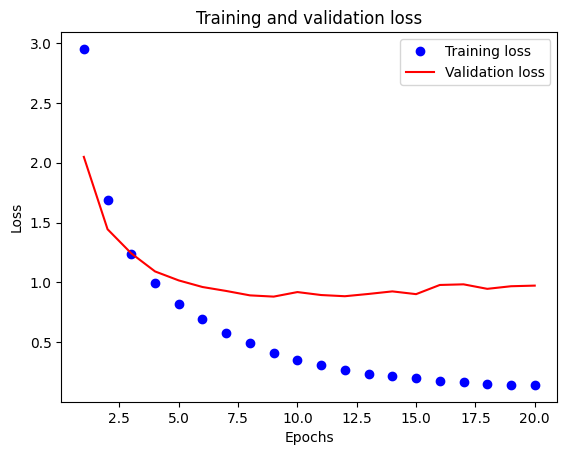

In [15]:
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


#epochs = range(1, len(loss)+1) 코드는 에포크(epoch) 수를 x축으로 사용하기 위해 range() 함수를 사용하여 1부터 loss 리스트의 길이까지의 정수 시퀀스를 만들어 epochs 변수에 저장
#plt.plot(epochs, loss, 'bo', label='Training loss') 코드는 epochs를 x축으로, loss를 y축으로 사용하여 훈련 데이터 손실을 파란색 원형 마커로 표시
#plt.plot(epochs, val_loss, 'r-', label='Validation loss') 코드는 epochs를 x축으로, val_loss를 y축으로 사용하여 검증 데이터 손실을 빨간색 실선으로 표시
#plt.title('Training and validation loss') 코드는 그래프의 제목을 'Training and validation loss'로 지정
#plt.xlabel('Epochs') 코드는 x축의 레이블을 'Epochs'로 지정
#plt.ylabel('Loss') 코드는 y축의 레이블을 'Loss'로 지정
#plt.legend() 코드는 범례(legend)를 그래프에 표시

#훈련 데이터 손실은 에포크 수가 증가할수록 감소하는 경향을 보이는 반면, 검증 데이터 손실은 어느 순간부터 상승하는 경향을 보이는 것을 확인할 수 있습니다. 이는 모델이 훈련 데이터에 과적합(overfitting)되기 시작하는 것을 의미

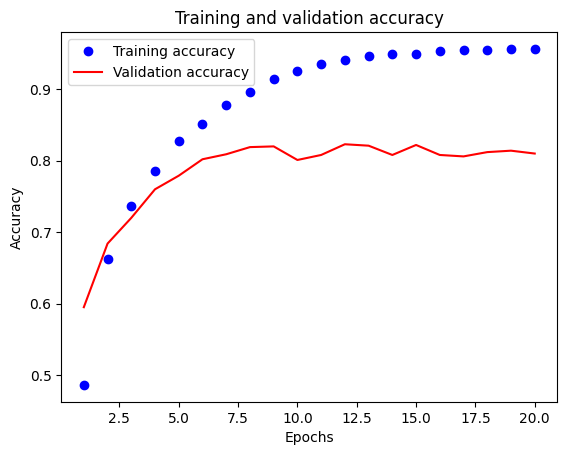

In [16]:
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

#plt.plot(epochs, acc, 'bo', label='Training accuracy') 코드는 epochs를 x축으로, acc를 y축으로 사용하여 훈련 데이터 정확도를 파란색 원형 마커로 표시
#plt.plot(epochs, val_acc, 'r-', label='Validation accuracy') 코드는 epochs를 x축으로, val_acc를 y축으로 사용하여 검증 데이터 정확도를 빨간색 실선으로 표시
#plt.title('Training and validation accuracy') 코드는 그래프의 제목을 'Training and validation accuracy'로 지정
#plt.xlabel('Epochs') 코드는 x축의 레이블을 'Epochs'로 지정
#plt.ylabel('Accuracy') 코드는 y축의 레이블을 'Accuracy'로 지정
#plt.legend() 코드는 범례(legend)를 그래프에 표시

In [17]:
# 검증 된 결과에 대한 평가 

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

eval_result = model.evaluate(x_test, one_hot_test_labels)
print(eval_result)


#model.evaluate(x_test, one_hot_test_labels) 코드를 통해 모델이 x_test 데이터셋을 예측한 결과와 one_hot_test_labels와의 오차(loss)와 정확도(accuracy)를 계산하여 반환하게 됩니다. 
#이러한 평가를 통해 모델이 얼마나 잘 일반화되어 새로운 데이터셋에 대해 예측하는지를 평가

Epoch 1/10
16/16 [==============================] - 2s 75ms/step - loss: 2.6891 - accuracy: 0.4693 - val_loss: 1.8136 - val_accuracy: 0.6270
Epoch 2/10
16/16 [==============================] - 1s 56ms/step - loss: 1.5491 - accuracy: 0.6748 - val_loss: 1.3842 - val_accuracy: 0.6910
Epoch 3/10
16/16 [==============================] - 1s 93ms/step - loss: 1.1891 - accuracy: 0.7440 - val_loss: 1.1984 - val_accuracy: 0.7420
Epoch 4/10
16/16 [==============================] - 2s 101ms/step - loss: 0.9691 - accuracy: 0.7866 - val_loss: 1.0960 - val_accuracy: 0.7460
Epoch 5/10
16/16 [==============================] - 1s 65ms/step - loss: 0.8042 - accuracy: 0.8247 - val_loss: 1.0320 - val_accuracy: 0.7700
Epoch 6/10
16/16 [==============================] - 1s 57ms/step - loss: 0.6742 - accuracy: 0.8520 - val_loss: 0.9583 - val_accuracy: 0.7920
Epoch 7/10
16/16 [==============================] - 1s 58ms/step - loss: 0.5646 - accuracy: 0.8771 - val_loss: 0.9390 - val_accuracy: 0.7980
Epoch 8/10
1